<a href="https://colab.research.google.com/github/unnimaya-vu/unnimaya-vu/blob/main/live_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans Clustering on FB Live selling Data

The data contains 7050 observations and twelve attributes. The data is about live selling feature on the Facebook platform. Each record consists of information about the time live information of sale is posted to Facebook and engagements in the data. The engagements are regular Facebook interactions such as share and emotion reaction.

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the Data

In [ ]:
df=pd.read_csv('/content/Live.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [ ]:
df.shape


(7050, 16)

In [ ]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN
7049,1050855161656896_1050858841656528,photo,9/10/2016 10:30,17,0,0,17,0,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df.dtypes

status_id            object
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

In [ ]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [ ]:
df.drop(['Column1','Column2','Column3','Column4'],axis=1,inplace=True)

Data Visualization

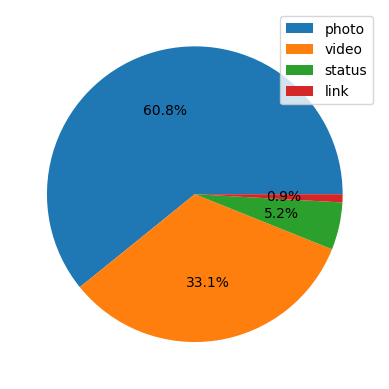

In [ ]:
plt.pie(df['status_type'].value_counts(),autopct='%1.1f%%')
plt.legend(df['status_type'].value_counts().index)

Text(0.5, 1.0, 'Scatter plot of number of likes vs shares')

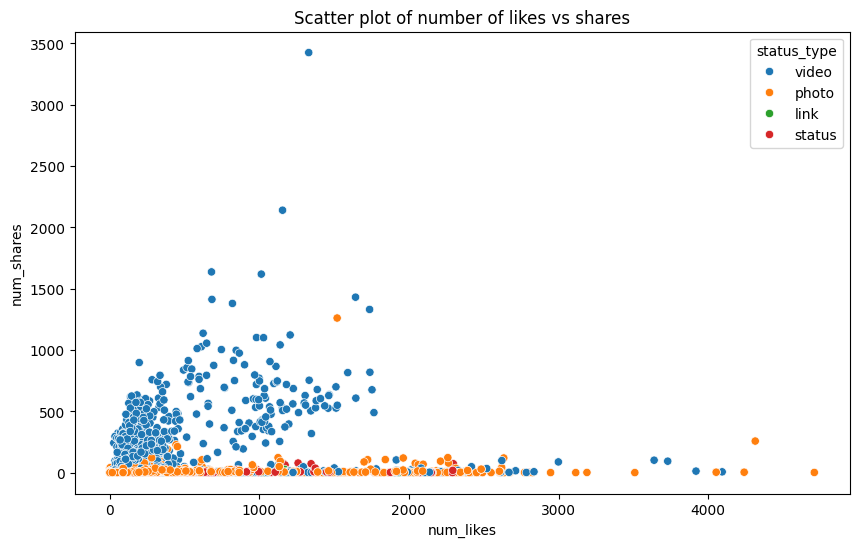

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['num_likes'],y=df['num_shares'],hue=df['status_type'])
plt.title('Scatter plot of number of likes vs shares')

Text(0.5, 1.0, 'Scatter plot of number of loves reaction vs shares ')

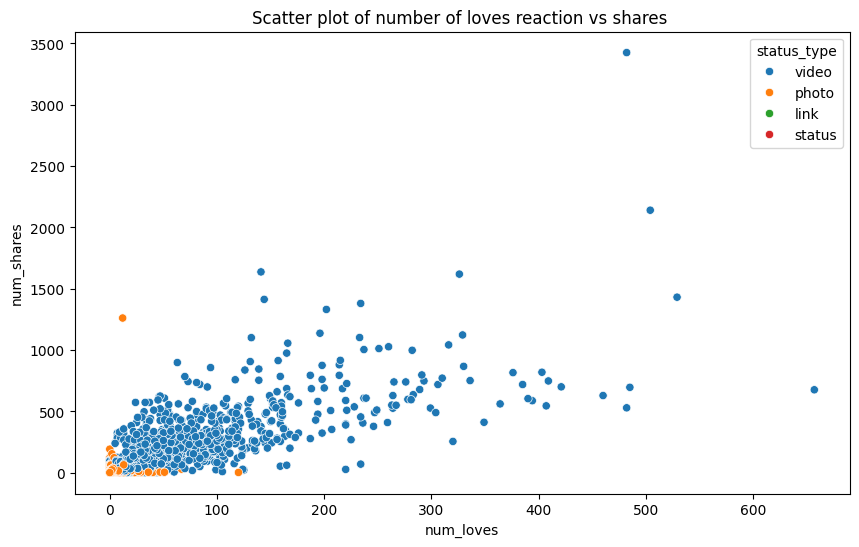

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['num_loves'],y=df['num_shares'],hue=df['status_type'])
plt.title('Scatter plot of number of loves reaction vs shares ')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


Now, we can see that redundant columns have been removed from the dataset.

We can see that, there are 3 character variables (data type = object) and remaining 9 numerical variables (data type = int64)

In [ ]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [ ]:
len(df['status_id'].unique())

6997

In [ ]:
len(df['status_published'].unique())

6913

In [ ]:
len(df['status_type'].unique())

4

we can see that there are 6913 and 6997 unique labels in the status_published and status_id variable. The total number of instances in the dataset is 7050. So, it is also a approximately a unique identifier for each of the instances. Thus this is not a variable that we can use.so drop them

In [ ]:
df.drop(['status_id','status_published'],axis=1,inplace=True)

View the summary of dataset again

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


Converting Categorical data to numerical value

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['status_type']=lab.fit_transform(df['status_type'])

In [ ]:
x=df.iloc[::]
x

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


Use elbow method to find optimal number of clusters

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  data=KMeans(n_clusters=i,init='k-means++',random_state=42)
  data.fit(x)
  wcss.append(data.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
print(wcss)

[8645692195.266678, 4986397875.914598, 2735263885.7707624, 2000980738.6639442, 1469929375.1750798, 1186926100.5944695, 923406623.6504002, 749947148.8579664, 621424725.9655619, 523198059.74937046]


Text(0.5, 1.0, 'Elbow method')

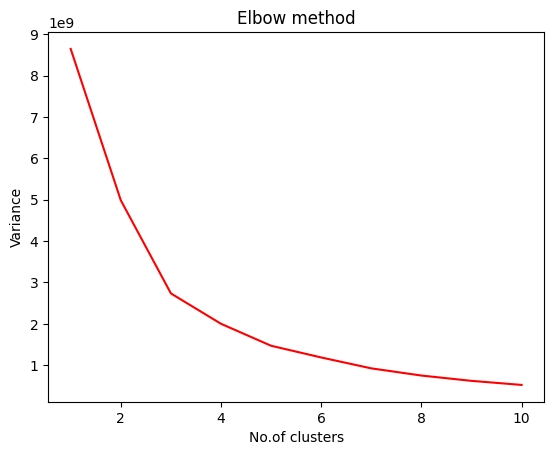

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss,color='r')
plt.xlabel('No.of clusters')
plt.ylabel('Variance')
plt.title('Elbow method')

K-Means model with 3 cluster(model)

In [ ]:
model=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_means=model.fit_predict(x)
y_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
x['clusters']=y_means
x

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,clusters
0,3,529,512,262,432,92,3,1,1,0,0
1,1,150,0,0,150,0,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0,0
3,1,111,0,0,111,0,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0,0
7047,1,2,0,0,1,1,0,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0,0


In [ ]:
x1=df.iloc[:,:-1]
x1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads
0,3,529,512,262,432,92,3,1,1
1,1,150,0,0,150,0,0,0,0
2,3,227,236,57,204,21,1,1,0
3,1,111,0,0,111,0,0,0,0
4,1,213,0,0,204,9,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0
7046,1,16,0,0,14,1,0,1,0
7047,1,2,0,0,1,1,0,0,0
7048,1,351,12,22,349,2,0,0,0


In [ ]:
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
7045    0
7046    0
7047    0
7048    0
7049    0
Name: num_angrys, Length: 7050, dtype: int64

In [ ]:
# check how many of the samples were correctly labeled
labels = model.labels_
correct_labels = sum(y==labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 6202 out of 7050 samples were correctly labeled.
Accuracy score: 0.88


We have achieved a relatively high accuracy of 88% with k=3

Train and test data split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.30,random_state=42)

Normalization using standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_test

array([[-0.73182083, -0.51073769, -0.2615946 , ..., -0.14465345,
        -0.17516736, -0.1358072 ],
       [-0.73182083,  0.14001328, -0.2615946 , ..., -0.14465345,
         0.06323609, -0.1358072 ],
       [-0.73182083, -0.47220638, -0.2615946 , ..., -0.14465345,
        -0.17516736, -0.1358072 ],
       ...,
       [-0.73182083,  2.63598571, -0.24639417, ..., -0.14465345,
        -0.17516736, -0.1358072 ],
       [ 1.39720401,  0.00301307, -0.2615946 , ..., -0.14465345,
        -0.17516736, -0.1358072 ],
       [-0.73182083, -0.47862826, -0.25906119, ..., -0.14465345,
        -0.17516736, -0.1358072 ]])

Creating model using KNN,NaiveBayes,SVM,RandomForest,Decision Tree

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
k_model=KNeighborsClassifier(n_neighbors=7)
n_model=GaussianNB()
s_model=SVC()
r_model=RandomForestClassifier()
d_model=DecisionTreeClassifier(criterion='entropy')
lst_model=[k_model,n_model,s_model,r_model,d_model]

Performance Evaluation

In [ ]:
for i in lst_model:
  print('Model is',i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('*'*50)
  print('Accuracy score is',accuracy_score(y_test,y_pred))


Model is KNeighborsClassifier(n_neighbors=7)
**************************************************
Accuracy score is 0.9371158392434988
Model is GaussianNB()
**************************************************
Accuracy score is 0.893144208037825
Model is SVC()
**************************************************
Accuracy score is 0.9371158392434988
Model is RandomForestClassifier()
**************************************************
Accuracy score is 0.933806146572104
Model is DecisionTreeClassifier(criterion='entropy')
**************************************************
Accuracy score is 0.9205673758865248
